In [1]:
import numpy as np
from RadarDevKit import RadarModule
from RadarDevKit.ConfigClasses import SysParams
from collect_data import get_range_bins
from config import RunParams, get_radar_module, get_radar_params, get_run_params

n_samples = 1024         # always 1024 samples per channel
radar_module = get_radar_module()
run_params= get_run_params()
num_time_steps = 125

range_axis = get_range_bins(radar_module)
time_axis = np.linspace(0, radar_module.sysParams.t_ramp, n_samples)

Connect
GetHwParams
Number of the connected Radar Module:  2130000071
GetSysParams
SetSysParams
GetSysParams
Frequency [MHz]:  24000
Bandwidth [MHz]:  600
Ramp-time [ms]:  7
Number Points:  512
Bin Size (Resolution) [m]:  0.249887

Connected to the radar.


In [2]:
from get_all_sensor_data import get_td_data_voltage
import datetime

td_data = []
sampling_times = []
total_times = []
run_time = datetime.datetime.now()


for i in range(num_time_steps):
    start_time = datetime.datetime.now()
    values = get_td_data_voltage(run_params=run_params, radar_module=radar_module)
    td_data.append(values)
    duration = datetime.datetime.now() - start_time
    sampling_times.append(duration.total_seconds())
    total_times.append((datetime.datetime.now() - run_time).total_seconds())

# Calculate the average sampling time
AVERAGE_SAMPLING_TIME  = sum(sampling_times) / len(sampling_times) if sampling_times else 0
print(AVERAGE_SAMPLING_TIME)

(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)


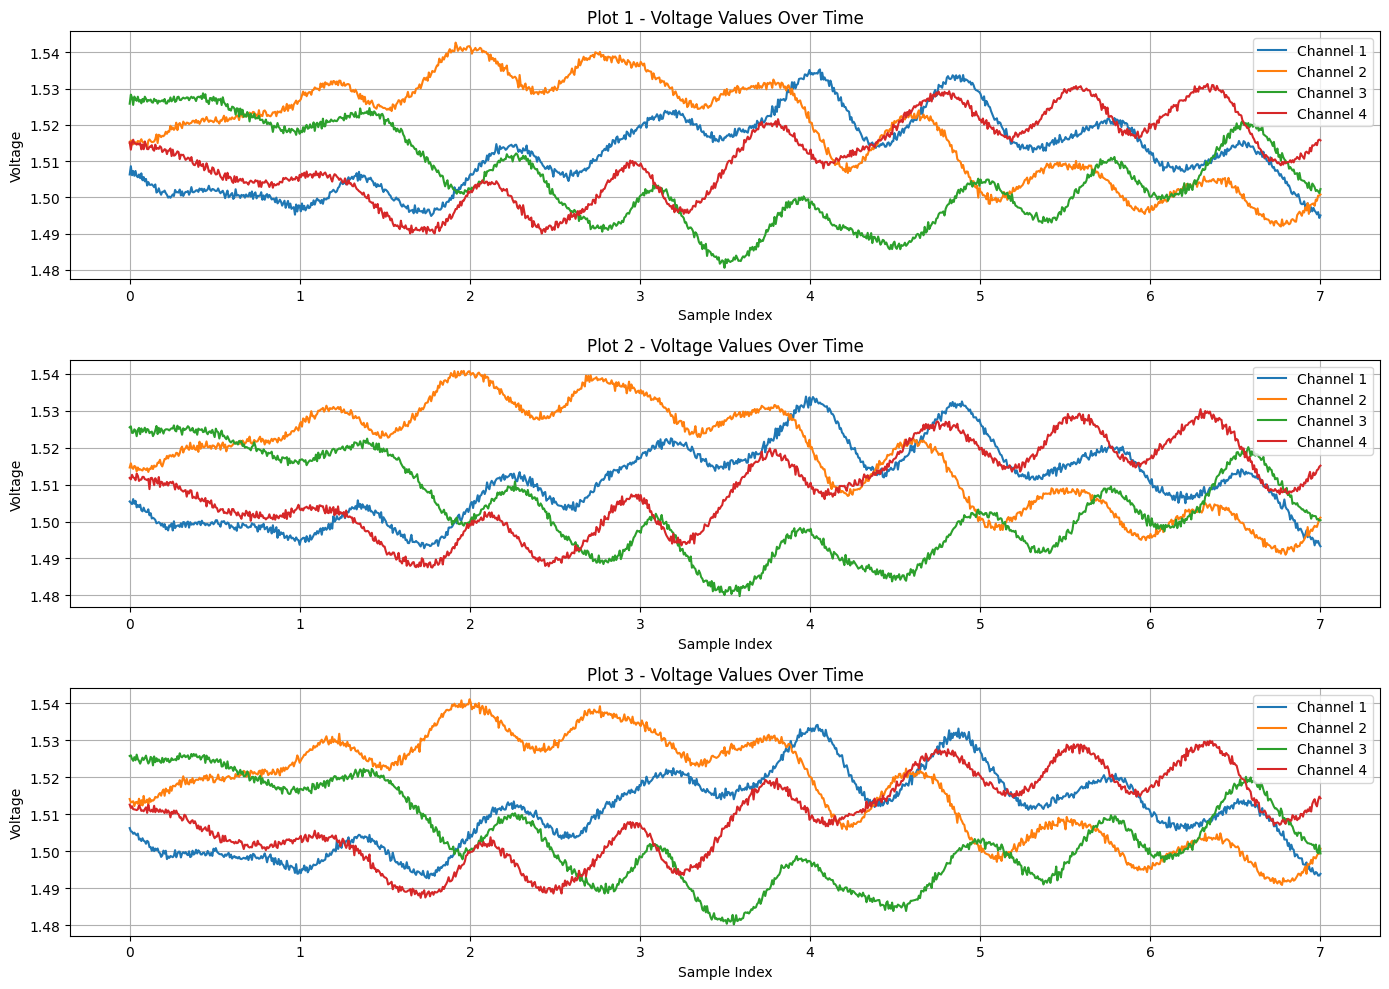

In [3]:
import matplotlib.pyplot as plt

# Assuming `test` is already populated with your data
# Create a single figure for all subplots
plt.figure(figsize=(14, 10))  # Adjust the figure size to accommodate all subplots

# Iterate over the first three arrays
for i, data in enumerate(td_data[0:3]):
    ax = plt.subplot(3, 1, i + 1)  # Create a subplot for each array
    for ch in range(4):
        ax.plot(time_axis, data[ch], label=f'Channel {ch+1}')  # Plot each channel's data on the current subplot
    
    ax.set_title(f'Plot {i+1} - Voltage Values Over Time')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Voltage')
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [4]:
radial_velocity_list = []

wavelength = 0.01238 # in meters (for 24.3 GHz)
time_interval = 0.007*0.98304  # in seconds

# Radial velocity
for i, data in enumerate(td_data):

    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    phase_difference = phase_2 - phase_1
    
    # Ensure the phase difference is within -pi to pi
    
    # phase_difference = np.arctan2(np.sin(phase_difference), np.cos(phase_difference))
    
    radial_velocity = (phase_difference * wavelength) / (4 * np.pi * time_interval)
    radial_velocity_list.append(radial_velocity[:512])

    # Convert to numpy array for easier plotting
radial_velocity_array = np.array(radial_velocity_list)

# Plotting
# for i in range(radial_velocity_array.shape[0]):
#     plt.plot(radial_velocity_array[i], label=f'Time interval {i+1}')

# plt.xlabel('Range Bin')
# plt.ylabel('Radial Velocity (m/s)')
# plt.title('Radial Velocity for Each Range Bin')
# # plt.legend()
# plt.grid(True)
# plt.show()

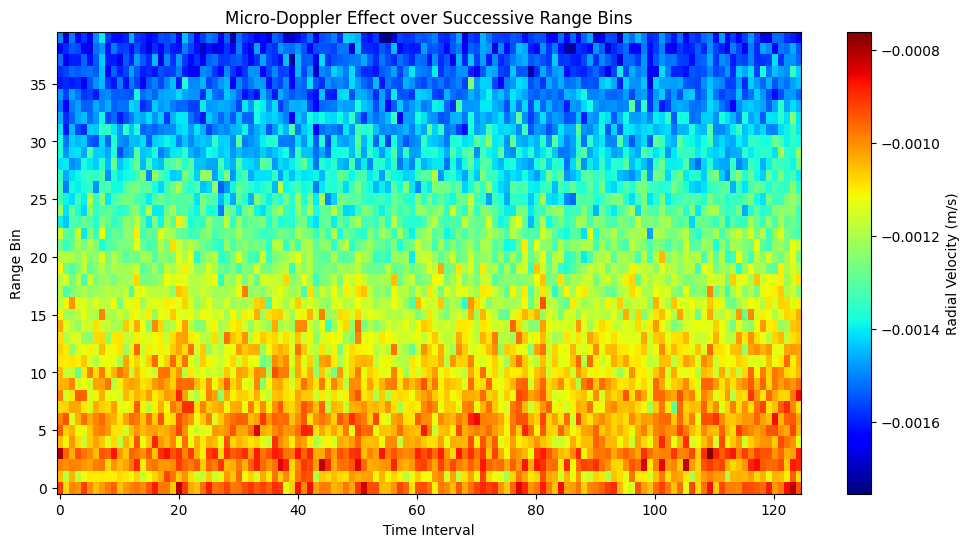

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_fd is your data array of shape (N, 4, 512)
# Sample data for demonstration (replace with your actual data)
# data_fd = np.random.randn(N, 4, 512)

# Constants
wavelength = 0.01238  # in meters (for 24.3 GHz)
time_interval = 0.007*0.98304  # in seconds
max_bin = 40

# Initialize a list to hold radial velocity data
radial_velocity_list = []

for i, data in enumerate(td_data):
    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    phase_difference = phase_2 - phase_1
    
    # Ensure the phase difference is within -pi to pi
    phase_difference = np.unwrap([phase_1, phase_2], axis=0)[1] - np.unwrap([phase_1, phase_2], axis=0)[0]
    
    radial_velocity = (phase_difference * wavelength) / (4 * np.pi * time_interval)
    radial_velocity_list.append(radial_velocity[0:max_bin])

# Convert to numpy array for easier plotting
radial_velocity_array = np.array(radial_velocity_list)

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(radial_velocity_array.T, aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Radial Velocity (m/s)')
plt.xlabel('Time Interval')
plt.ylabel('Range Bin')
plt.title('Micro-Doppler Effect over Successive Range Bins')
plt.show()